# **1. Setup And Load Data**




1.1 Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

1.2 Remove dodgy images

In [32]:
import cv2
import imghdr

In [29]:
data_dir = '/content/drive/MyDrive/project/data'

In [30]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [35]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image: {}'.format(image_path))

Image not in ext list: /content/drive/MyDrive/project/data/sampah bisa didaur ulang/cb01a07fe18859958cbb6e605d6c5ec1.jpg_720x720q80.jpg_.webp
Image not in ext list: /content/drive/MyDrive/project/data/sampah bisa didaur ulang/zUw7ofOMvR.jpg
Image not in ext list: /content/drive/MyDrive/project/data/sampah bisa didaur ulang/supplierbotolplastikbekasdilabuanbajo.jpg.webp
Image not in ext list: /content/drive/MyDrive/project/data/sampah bisa didaur ulang/4f676b6e-026b-4f1a-bba6-2caf479a0ee8w.png
Image not in ext list: /content/drive/MyDrive/project/data/sampah bisa didaur ulang/81075ae1-d31d-4a1e-b5d0-6fe0fb92e754w (1).jpg
Image not in ext list: /content/drive/MyDrive/project/data/sampah bisa didaur ulang/40754005-25aa-4c71-95d1-26f06436a1e4w.jpg
Image not in ext list: /content/drive/MyDrive/project/data/sampah bisa didaur ulang/5855d965-b736-41ba-badd-d9d90cf723b5.jpg
Image not in ext list: /content/drive/MyDrive/project/data/sampah bisa didaur ulang/81075ae1-d31d-4a1e-b5d0-6fe0fb92e754w

1.3 Load Data

In [37]:
tf.data.Dataset??

In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/project/data')

Found 391 files belonging to 2 classes.


In [41]:
data_iterator = data.as_numpy_iterator()

In [48]:
# Get another batch from the iterator
batch = data_iterator.next()

In [49]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [52]:
# Class 1 = sampah residu
# Class 0 = sampah bisa didaur ulang
batch[1]

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

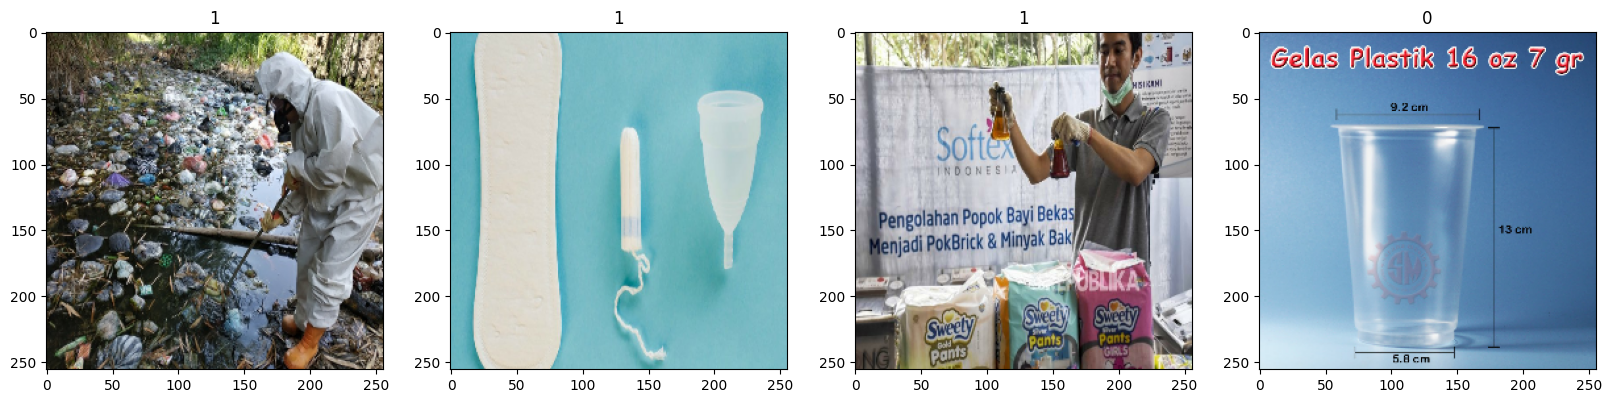

In [51]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [56]:
scaled = batch[0] / 225

In [57]:
scaled.max()

1.1333333

# **2. Preprocess Data**

2.1 Scale Data

In [58]:
data = data.map(lambda x, y: (x/255, y))

In [61]:
scaled_iterator = data.as_numpy_iterator()

In [62]:
batch = scaled_iterator.next()

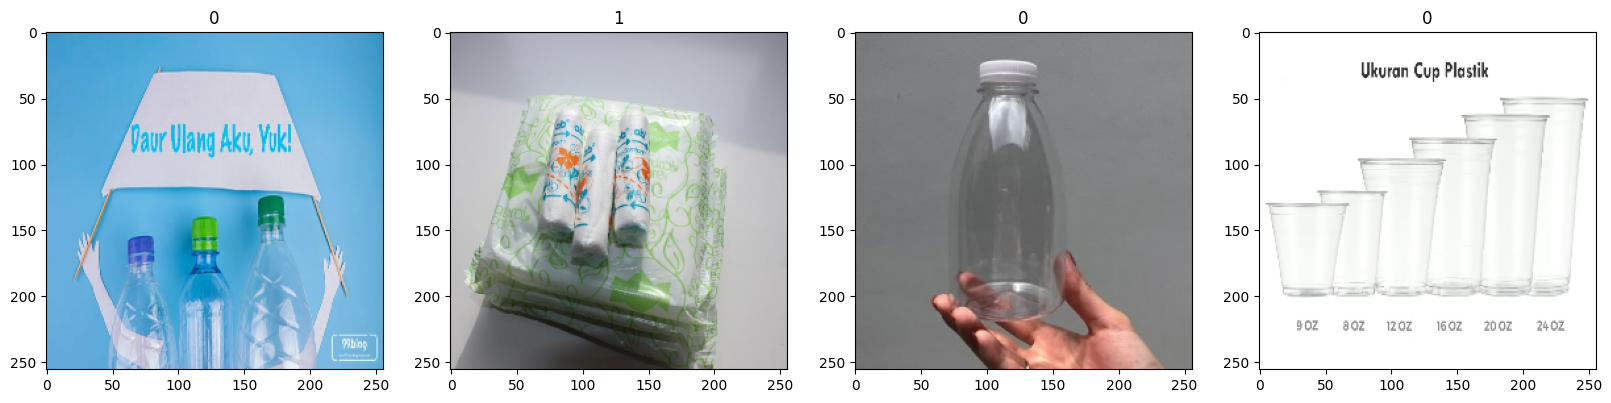

In [63]:
fix, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [66]:
len(data)

13

In [87]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [88]:
train_size+val_size+test_size

13

In [89]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [90]:
len(test)

1

# **3. Deep Model**

3.1 Build Deep Learning Model

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [108]:
model = Sequential()

In [109]:
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [111]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

3.2 Train

In [113]:
logdir ='/content/drive/MyDrive/project/logs'

In [114]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [116]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 18s 378ms/step - loss: 0.9820 - accuracy: 0.4656 - val_loss: 0.6888 - val_accuracy: 0.4844
Epoch 2/20
10/10 [==============================] - 6s 446ms/step - loss: 0.6896 - accuracy: 0.5594 - val_loss: 0.6816 - val_accuracy: 0.6406
Epoch 3/20
10/10 [==============================] - 8s 508ms/step - loss: 0.6809 - accuracy: 0.5625 - val_loss: 0.6256 - val_accuracy: 0.7812
Epoch 4/20
10/10 [==============================] - 8s 608ms/step - loss: 0.6397 - accuracy: 0.6594 - val_loss: 0.6053 - val_accuracy: 0.6875
Epoch 5/20
10/10 [==============================] - 6s 438ms/step - loss: 0.5948 - accuracy: 0.6812 - val_loss: 0.5949 - val_accuracy: 0.6875
Epoch 6/20
10/10 [==============================] - 9s 698ms/step - loss: 0.5441 - accuracy: 0.7563 - val_loss: 0.4885 - val_accuracy: 0.7344
Epoch 7/20
10/10 [==============================] - 7s 611ms/step - loss: 0.4724 - accuracy: 0.7875 - val_loss: 0.4505 - val_accuracy: 0.7188
Epoch

In [118]:
hist.history

{'loss': [0.9820440411567688,
  0.6895848512649536,
  0.6809488534927368,
  0.6396594047546387,
  0.594845175743103,
  0.5440946221351624,
  0.47240138053894043,
  0.39318037033081055,
  0.3027237057685852,
  0.23874399065971375,
  0.1712941974401474,
  0.12373976409435272,
  0.08787555247545242,
  0.09038472175598145,
  0.08950527757406235,
  0.07862453907728195,
  0.05731130763888359,
  0.03993048518896103,
  0.021930983290076256,
  0.11840832233428955],
 'accuracy': [0.46562498807907104,
  0.559374988079071,
  0.5625,
  0.659375011920929,
  0.6812499761581421,
  0.7562500238418579,
  0.7875000238418579,
  0.8218749761581421,
  0.903124988079071,
  0.903124988079071,
  0.949999988079071,
  0.965624988079071,
  0.96875,
  0.965624988079071,
  0.9906250238418579,
  0.971875011920929,
  0.981249988079071,
  0.9937499761581421,
  1.0,
  0.956250011920929],
 'val_loss': [0.6888222694396973,
  0.6815795302391052,
  0.6255791187286377,
  0.6052817106246948,
  0.5949373245239258,
  0.4885422

3.3 Plot Performance

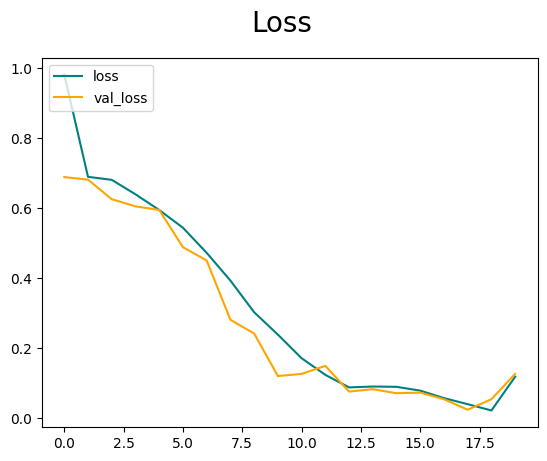

In [120]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

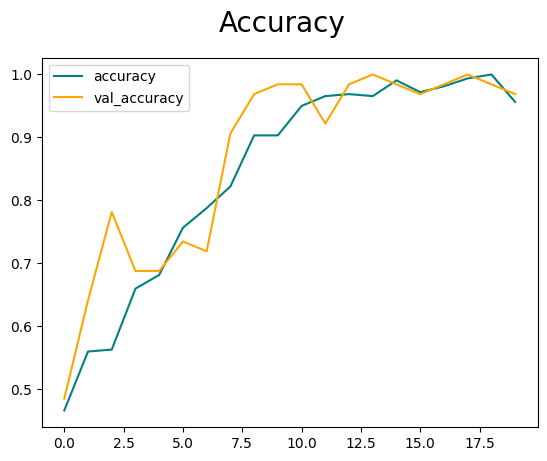

In [121]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **4. Evaluate Performance**

4.1 Evaluate

In [122]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [123]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [124]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 529ms/step


In [125]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


4.2 Test

In [126]:
import cv2

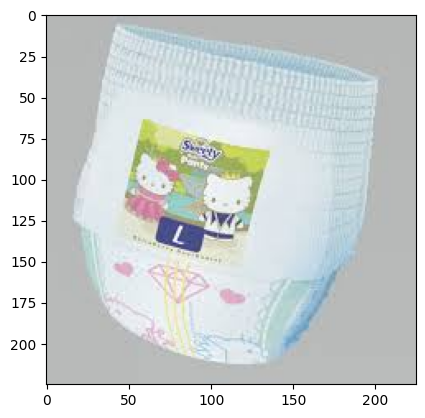

In [141]:
img = cv2.imread('/content/drive/MyDrive/project/data/test sampah residu.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

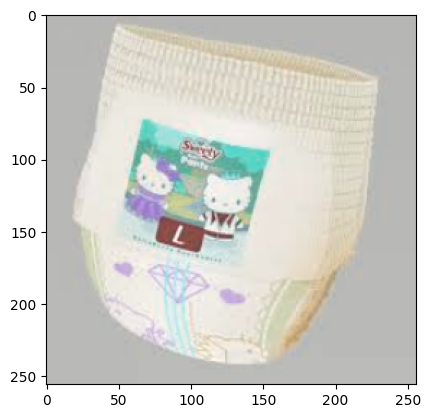

In [142]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [143]:
resize.shape

TensorShape([256, 256, 3])

In [144]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [145]:
yhat = model.predict(np.expand_dims(resize/225, 0))

1/1 [==============================] - 0s 23ms/step


In [146]:
yhat

array([[0.6876855]], dtype=float32)

In [147]:
if yhat > 0.5:
    print(f'Sampah Residu')
else:
    print(f'Sampah Bisa Didaur Ulang')

Sampah Residu


# **5. Save the Model**

5.1 Save the Model

In [149]:
from tensorflow.keras.models import load_model

In [150]:
model.save(os.path.join('/content/drive/MyDrive/project/model', 'recyclemodel.h5'))

In [151]:
from keras.models import model_from_json

In [153]:
model_json = model.to_json()

In [155]:
with open('/content/drive/MyDrive/project/model.json', 'w') as json_file:
    json_file.write(model_json)

In [156]:
model.save_weights("/content/drive/MyDrive/project/model_weights.h5")